# TRABAJO PRÁCTICO 1

### Algoritmos Genéticos

Alumno: Leandro Bello

In [324]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

### EJERCICIO 1

Crear en Python un vector columna A de 20 individuos binarios aleatorios de tipo string. Crear un segundo vector columna B de 20 números aleatorios comprendidos en el intervalo (0, 1). Mutar un alelo aleatorio a aquellos genes pertenecientes a los cromosomas de A que tengan en su i-ésima fila un correspondiente de B inferior a 0.09. Almacenar los cromosomas mutados en un vector columna C y mostrarlos por consola.

In [325]:
np.random.seed(22)
random.seed(22)

LONGITUD_CROMOSOMA = 5
p = 0.09

pre_A = []
post_A = []
B = np.random.rand(20)
mat_chromosomes = np.random.randint(2, size=(20, LONGITUD_CROMOSOMA))
for i, chromosome in enumerate(mat_chromosomes):
    pre_A.append(''.join(map(str, chromosome)))
    # Si la probabilidad es menor a p, elijo aleatoriamente un alelo del cromosoma y lo cambio.
    if B[i] < p:
        pos = np.random.randint(LONGITUD_CROMOSOMA)
        chromosome[pos] = 0 if chromosome[pos]==1 else 1
        print(f"Se cambió el alelo {pos} del cromosoma {i}")
    post_A.append(''.join(map(str, chromosome)))

# Muestro los cromosomas A antes y después de la mutación.
probs = [f"{b:0.4f}" for b in B]
print("-----")
print("Probabilidades:")
print(probs)
print("-----")
print("Antes de la mutación:")
print(pre_A)
print("-----")
print("Después de la mutación:")
print(post_A)

Se cambió el alelo 0 del cromosoma 10
Se cambió el alelo 4 del cromosoma 15
-----
Probabilidades:
['0.2085', '0.4817', '0.4205', '0.8592', '0.1712', '0.3389', '0.2705', '0.6910', '0.2204', '0.8120', '0.0105', '0.5612', '0.8137', '0.7451', '0.1891', '0.0061', '0.7720', '0.9578', '0.7019', '0.2976']
-----
Antes de la mutación:
['11110', '01110', '10101', '11111', '11010', '01111', '11011', '10101', '10110', '00110', '10001', '11010', '01100', '10001', '10110', '10010', '01011', '01101', '11101', '00001']
-----
Después de la mutación:
['11110', '01110', '10101', '11111', '11010', '01111', '11011', '10101', '10110', '00110', '00001', '11010', '01100', '10001', '10110', '10011', '01011', '01101', '11101', '00001']


### EJERCICIO 2

Maximizar mediante un algoritmo genético desarrollado en Python la función $y = x^2$. Los parámetros del algoritmos son:
* Selección por ruleta
* Cruza monopunto aleatoria
* Probabilidad de cruce 0.92
* Probabilidad de mutación 0.01

In [326]:
###################################################################
# Algoritmo Gneñetico que encuentra el maximo de la funcion x^2
# Seleccion por ruleta
# Pc = 0.92
# Pm = 0.1
###################################################################

In [327]:
# Parámetros
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 5
TASA_MUTACION = 0.1
TASA_CRUCE = 0.92
GENERACIONES = 10

In [328]:
###################################################################
# Aptitud (y = x^2)
###################################################################
def aptitud(cromosoma):
    x = int(cromosoma, 2)
    return x ** 2

In [329]:
###################################################################
# Inicializar la población
###################################################################
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for z in range(tamanio_poblacion):
        cromosoma = ""
        for t in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

In [330]:
###################################################################
# Seleccion por ruleta
###################################################################
def seleccion_ruleta(poblacion, aptitud_total):
    seleccion = random.uniform(0, aptitud_total)
    aptitud_actual = 0
    for individuo in poblacion:
        aptitud_actual = aptitud_actual+aptitud(individuo)
        if aptitud_actual > seleccion:
            return individuo

In [331]:
###################################################################
# Cruce monopunto con probabilidad de cruza pc = 0.92
###################################################################
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

In [332]:
###################################################################
# mutacion
###################################################################
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado+str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado+bit
    return cromosoma_mutado

In [333]:
###################################################################
# aplicacion de operadores geneticos
###################################################################
def algoritmo_genetico(tamaño_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamaño_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # Calcular aptitud total para luego
        aptitud_total = 0
        for cromosoma in poblacion:
            aptitud_total = aptitud_total+aptitud(cromosoma)

        print("Aptitud total:", aptitud_total)

        # ..................................................................
        # seleccion
        # de progenitores con el metodo ruleta
        # se crea una lista vacia de progenitores primero
        progenitores = []
        for _ in range(tamaño_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        # ..................................................................
        # Cruce
        descendientes = []
        for i in range(0, tamaño_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        # ..................................................................
        # mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aqui se aplica elitismo
        # se reemplazar los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        print("Mejor individuo:", int(mejor_individuo, 2), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)

In [334]:
random.seed(22)

###################################################################
# algoritmo genetico ejecucion principal
###################################################################
print("_________________________________________________________________________________")
print("_________________________________________________________________________________")
print()
mejor_solucion = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", int(mejor_solucion, 2), "Aptitud:", aptitud(mejor_solucion))

_________________________________________________________________________________
_________________________________________________________________________________

Generación: 1
Aptitud total: 381
Mejor individuo: 25 Aptitud: 625
_________________________________________________________________________________
Generación: 2
Aptitud total: 1213
Mejor individuo: 31 Aptitud: 961
_________________________________________________________________________________
Generación: 3
Aptitud total: 2995
Mejor individuo: 31 Aptitud: 961
_________________________________________________________________________________
Generación: 4
Aptitud total: 3331
Mejor individuo: 31 Aptitud: 961
_________________________________________________________________________________
Generación: 5
Aptitud total: 3844
Mejor individuo: 31 Aptitud: 961
_________________________________________________________________________________
Generación: 6
Aptitud total: 3844
Mejor individuo: 31 Aptitud: 961
________________________

### EJERCICIO 3

La tasa de crecimiento g de una levadura que produce cierto antibiótico es una función del nivel de concentración del alimento c en el intervalo [0, 10], siendo:

$$ 
g = \frac{2c}{4+0.8c+c^2+0.2c^3}
$$

Mediante un algoritmo genético escrito en Python con representación de individuos binarios, con operador de selección por torneo, probabilidad de cruce pc de 0.85 y probabilidad de mutación pm de 0.07, realizar las siguientes consignas:
* Encontrar el valor aproximado de c para el cual g es máximo. Utilizar precisión de 2 decimales.
* Transcribir el algoritmo genético comentando brevemente las secciones de código que sean relevantes.
* Graficar g en función de c en el intervalo [-1, 20] y agregar un punto rojo en la gráfica en donde el algoritmo haya encontrado el valor máximo. El gráfico debe contener título, leyenda y etiquetas en los ejes.
* Graficar las mejores aptitudes encontradas en función de cada generación. El gráfico debe contener título, leyenda y etiquetas en los ejes.

In [603]:
# Parámetros
TAMANIO_POBLACION = 16
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.07
TASA_CRUCE = 0.85
GENERACIONES = 20
TAMANIO_TORNEO = 3
PRECISION = 2

In [604]:
###################################################################
# Conversión de cromosoma binario a decimal con precisión y rango
###################################################################
def binario_a_decimal(cromosoma, precision, rango):
    entero = int(cromosoma, 2)
    max_entero = 2**len(cromosoma) - 1
    decimal = rango[0] + (entero / max_entero) * (rango[1] - rango[0])
    return round(decimal, precision)

In [605]:
###################################################################
# Aptitud
###################################################################
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma, PRECISION, rango=(0, 10))
    g = 2*x/(4+0.8*x+x**2+0.2*x**3)
    return g

In [606]:
###################################################################
# Seleccion por torneo
###################################################################
def seleccion_torneo(poblacion, tamaño_torneo):
    participantes = random.sample(poblacion, tamaño_torneo)
    mejor_individuo = max(participantes, key=aptitud)
    return mejor_individuo

In [620]:
###################################################################
# aplicacion de operadores geneticos
###################################################################
def algoritmo_genetico(tamaño_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamaño_poblacion, longitud_cromosoma)

    gens_vals = []
    
    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # Calcular aptitud total para luego
        aptitud_total = 0
        for cromosoma in poblacion:
            aptitud_total = aptitud_total+aptitud(cromosoma)

        print("Aptitud total:", aptitud_total)

        # ..................................................................
        # seleccion
        # de progenitores con el metodo ruleta
        # se crea una lista vacia de progenitores primero
        progenitores = []
        for _ in range(tamaño_poblacion):
            progenitores.append(seleccion_torneo(poblacion, TAMANIO_TORNEO))

        # ..................................................................
        # Cruce
        descendientes = []
        for i in range(0, tamaño_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        # ..................................................................
        # mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aqui se aplica elitismo
        # se reemplazar los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        mejor_x = binario_a_decimal(mejor_individuo, PRECISION, rango=(0, 10))
        print("Mejor individuo:", mejor_individuo, "Valor X:", mejor_x, "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

        gens_vals.append(aptitud(mejor_individuo))
    
    return mejor_individuo, mejor_x, gens_vals

In [621]:
np.random.seed(22)
random.seed(22)

###################################################################
# algoritmo genetico ejecucion principal
###################################################################
print("_________________________________________________________________________________")
print("_________________________________________________________________________________")
print()
mejor_solucion, mejor_x, gens_vals = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", mejor_x, "Aptitud:", aptitud(mejor_solucion))

_________________________________________________________________________________
_________________________________________________________________________________

Generación: 1
Aptitud total: 3.352666786782723
Mejor individuo: 0010011000 Valor X: 1.49 Aptitud: 0.3691001356034263
_________________________________________________________________________________
Generación: 2
Aptitud total: 5.401177283021563
Mejor individuo: 0010011100 Valor X: 1.52 Aptitud: 0.3694359063701639
_________________________________________________________________________________
Generación: 3
Aptitud total: 5.717751212851426
Mejor individuo: 0010011110 Valor X: 1.54 Aptitud: 0.3695680929691254
_________________________________________________________________________________
Generación: 4
Aptitud total: 5.824117068482621
Mejor individuo: 0010011110 Valor X: 1.54 Aptitud: 0.3695680929691254
_________________________________________________________________________________
Generación: 5
Aptitud total: 5.89916816

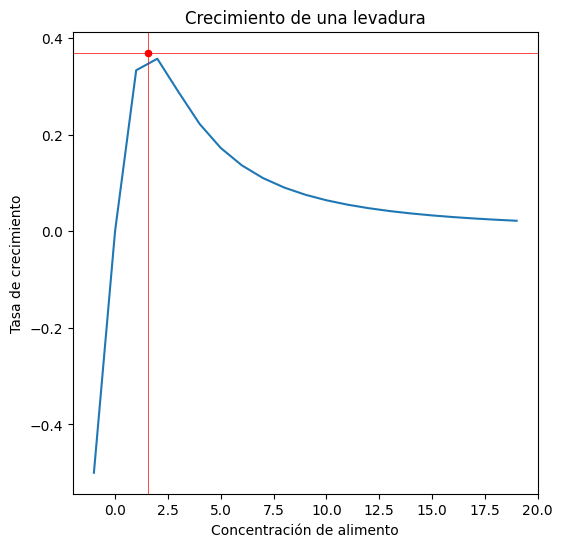

In [623]:
def func(x):
    return 2*x/(4+0.8*x+x**2+0.2*x**3)

x = np.arange(-1, 20)
y = func(x)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y)
ax.scatter(mejor_x, aptitud(mejor_solucion), c='red', s=20)
ax.axhline(y=aptitud(mejor_solucion), color='red', linewidth=0.5)
ax.axvline(x=mejor_x, color='red', linewidth=0.5)
ax.set_title("Crecimiento de una levadura")
ax.set_xlabel('Concentración de alimento')
ax.set_ylabel('Tasa de crecimiento')
plt.show()

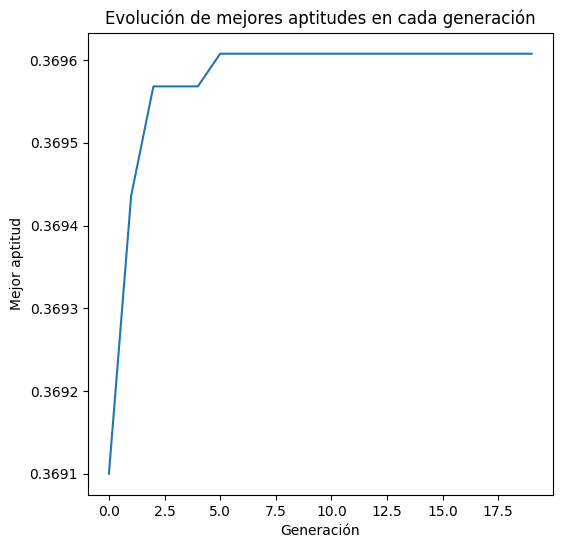

In [624]:
x = np.arange(len(gens_vals))
y = gens_vals

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y)
ax.set_title("Evolución de mejores aptitudes en cada generación")
ax.set_xlabel('Generación')
ax.set_ylabel('Mejor aptitud')
plt.show()

### EJERCICIO 4

La distribución de la concentración de cierto contaminante en un canal está descrita por la ecuación:
$$ 
c(x,y) = 7.7+0.15x+0.22y-0.05x^2-0.016y^2-0.007xy
$$
En donde, las variables independientes se encuentran entre los límites de $–10 ≤ x ≤10, 0 ≤ y ≤ 20$.
Para la función de adaptación anterior, escribir y ejecutar un algoritmo genético que utilice el operador de selección por ruleta con probabilidades de cruza y mutación a elección. Luego realizar las siguientes consignas:
* Determinar en forma aproximada la concentración máxima dada la función c(x, y). Utilizar una precisión de 3 decimales.
* Transcribir el algoritmo genético comentando brevemente las secciones de código que sean relevantes.
* Graficar c(x, y) para los intervalos de las variables independientes ya mencionados y agregar un punto rojo en la gráfica en donde el algoritmo haya encontrado el valor máximo. El gráfico debe contener título, leyenda y etiquetas en los ejes.
* Graficar las mejores aptitudes encontradas en función de cada generación. El gráfico debe contener título, leyenda y etiquetas en los ejes.

In [808]:
# Parámetros
TAMANIO_POBLACION = 128*4
LONGITUD_CROMOSOMA = 16
TASA_MUTACION = 0.09
TASA_CRUCE = 0.7
GENERACIONES = 50
PRECISION = 3
#TAMANIO_TORNEO = 12

In [809]:
###################################################################
# Conversión de cromosoma binario a decimal con precisión y rango
###################################################################
def binario_a_decimal(cromosoma, precision, rango):
    entero = int(cromosoma, 2)
    max_entero = 2**len(cromosoma) - 1
    decimal = rango[0] + (entero / max_entero) * (rango[1] - rango[0])
    return round(decimal, precision)

In [810]:
###################################################################
# Aptitud
###################################################################
def aptitud(cromosoma):
    n = len(cromosoma) // 2
    x = binario_a_decimal(cromosoma[:n], PRECISION, rango=(-10, 10))
    y = binario_a_decimal(cromosoma[n:], PRECISION, rango=(0, 20))
    c = 7.7+0.15*x+0.22*y-0.05*x**2-0.016*y**2-0.007*x*y
    return c

In [811]:
###################################################################
# Inicializar la población
###################################################################
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = "".join(str(random.randint(0, 1)) for _ in range(longitud_cromosoma))
        poblacion.append(cromosoma)
    return poblacion

In [812]:
###################################################################
# Seleccion por ruleta
###################################################################
def seleccion_ruleta(poblacion, aptitud_total):
    seleccion = random.uniform(0, aptitud_total)
    aptitud_actual = 0
    for individuo in poblacion:
        aptitud_actual = aptitud_actual+aptitud(individuo)
        if aptitud_actual > seleccion:
            return individuo

In [813]:
###################################################################
# Seleccion por torneo
###################################################################
def seleccion_torneo(poblacion, tamaño_torneo):
    participantes = random.sample(poblacion, tamaño_torneo)
    mejor_individuo = max(participantes, key=aptitud)
    return mejor_individuo

In [814]:
###################################################################
# Cruce monopunto
###################################################################
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

In [815]:
###################################################################
# mutacion
###################################################################
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado+str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado+bit
    return cromosoma_mutado

In [816]:
###################################################################
# aplicacion de operadores geneticos
###################################################################
def algoritmo_genetico(tamaño_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamaño_poblacion, longitud_cromosoma)

    gens_vals = []

    for generacion in tqdm(range(generaciones)):
        print("Generación:", generacion + 1)

        # Calcular aptitud total para luego
        aptitud_total = 0
        for cromosoma in poblacion:
            aptitud_total = aptitud_total+aptitud(cromosoma)

        print("Aptitud total:", aptitud_total)

        # ..................................................................
        # seleccion
        # de progenitores con el metodo ruleta
        # se crea una lista vacia de progenitores primero
        progenitores = []
        for _ in range(tamaño_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))
            #progenitores.append(seleccion_torneo(poblacion, TAMANIO_TORNEO))

        # ..................................................................
        # Cruce
        descendientes = []
        for i in range(0, tamaño_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        # ..................................................................
        # mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aqui se aplica elitismo
        # se reemplazar los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        x_mejor = binario_a_decimal(mejor_individuo[:longitud_cromosoma//2], PRECISION, rango=(-10, 10))
        y_mejor = binario_a_decimal(mejor_individuo[longitud_cromosoma//2:], PRECISION, rango=(0, 20))
        print("Mejor individuo:", mejor_individuo, "-> x:", x_mejor, ", y:", y_mejor, "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

        gens_vals.append(aptitud(mejor_individuo))

    return mejor_individuo, x_mejor, y_mejor, gens_vals

In [817]:
np.random.seed(22)
random.seed(22)

###################################################################
# algoritmo genetico ejecucion principal
###################################################################
print("_________________________________________________________________________________")
print("_________________________________________________________________________________")
print()
mejor_solucion, x_mejor, y_mejor, gens_vals = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
print("Mejor solución:", "-> x:", x_mejor, ", y:", y_mejor, "Aptitud:", aptitud(mejor_solucion))

_________________________________________________________________________________
_________________________________________________________________________________



  0%|          | 0/50 [00:00<?, ?it/s]

Generación: 1
Aptitud total: 3164.8925944149996
Mejor individuo: 1000111001011011 -> x: 1.137 , y: 7.137 Aptitud: 8.504259863
_________________________________________________________________________________
Generación: 2
Aptitud total: 3906.194776579999
Mejor individuo: 1000111001011011 -> x: 1.137 , y: 7.137 Aptitud: 8.504259863
_________________________________________________________________________________
Generación: 3
Aptitud total: 4124.196962109999
Mejor individuo: 1000111101010011 -> x: 1.216 , y: 6.51 Aptitud: 8.50717248
_________________________________________________________________________________
Generación: 4
Aptitud total: 4213.314870569002
Mejor individuo: 1000110001010100 -> x: 0.98 , y: 6.588 Aptitud: 8.508718416
_________________________________________________________________________________
Generación: 5
Aptitud total: 4261.31232631
Mejor individuo: 1000110001010100 -> x: 0.98 , y: 6.588 Aptitud: 8.508718416
______________________________________________________

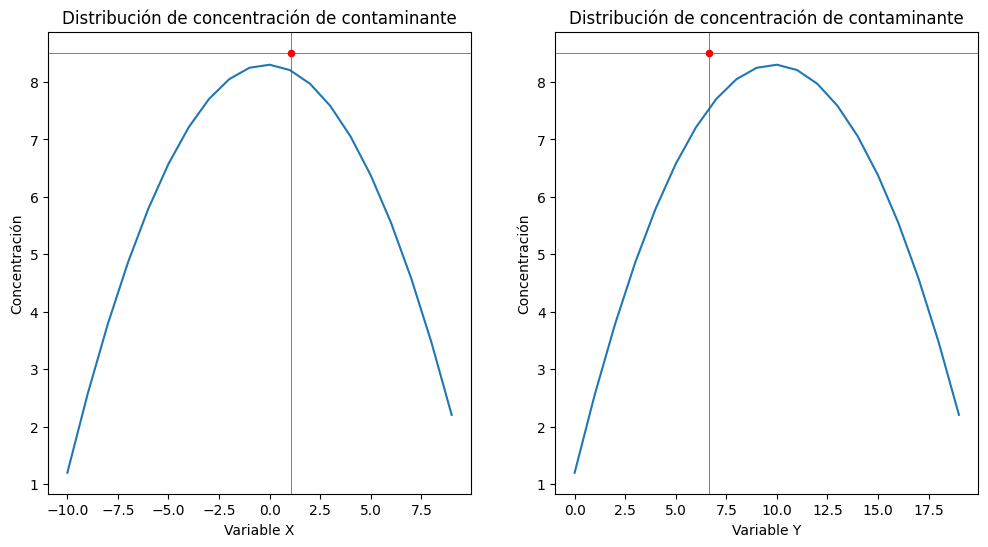

In [821]:
def func(x, y):
    return 7.7+0.15*x+0.22*y-0.05*x**2-0.016*y**2-0.007*x*y

x1 = np.arange(-10, 10)
x2 = np.arange(0, 20)
y = func(x1, x2)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(x1, y)
ax[0].scatter(x_mejor, aptitud(mejor_solucion), c='red', s=20)
ax[0].axhline(y=aptitud(mejor_solucion), color='red', linewidth=0.5)
ax[0].axvline(x=x_mejor, color='red', linewidth=0.5)
ax[0].set_title("Distribución de concentración de contaminante")
ax[0].set_xlabel('Variable X')
ax[0].set_ylabel('Concentración')

ax[1].plot(x2, y)
ax[1].scatter(y_mejor, aptitud(mejor_solucion), c='red', s=20)
ax[1].axhline(y=aptitud(mejor_solucion), color='red', linewidth=0.5)
ax[1].axvline(x=y_mejor, color='red', linewidth=0.5)
ax[1].set_title("Distribución de concentración de contaminante")
ax[1].set_xlabel('Variable Y')
ax[1].set_ylabel('Concentración')

plt.show()

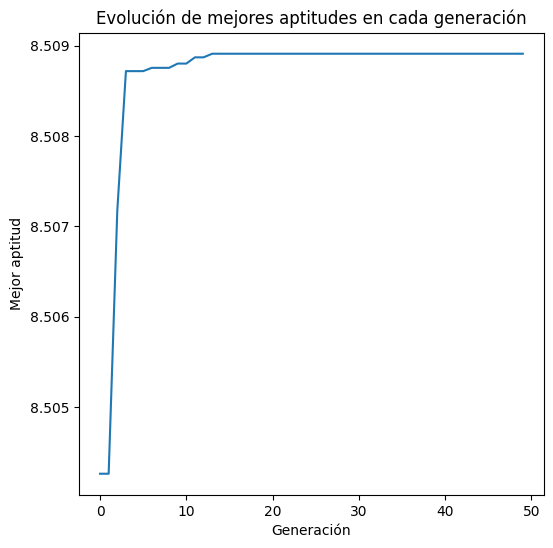

In [822]:
x = np.arange(len(gens_vals))
y = gens_vals

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y)
ax.set_title("Evolución de mejores aptitudes en cada generación")
ax.set_xlabel('Generación')
ax.set_ylabel('Mejor aptitud')
plt.show()